In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import itertools
from scipy.special import kn
from scipy import optimize
from utils import *

In [2]:
# config = '24I/ml_0p01'
config = '24I/ml_0p005'
# config = '32I/ml0p008'
# config = '32I/ml0p006'
# config = '32I/ml0p004'
ainv_24I = [1.784, 0.005]
ainv_32I = [2.382, 0.008]
ainv_ensemble = gen_fake_ensemble(ainv_24I)
# ainv_ensemble = gen_fake_ensemble(ainv_32I)
# f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/3pt_output.h5'
f3pt_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/SD_output.h5'

In [3]:
f = h5py.File(f3pt_path, 'r')
L, T = f['L'][()], f['T'][()]
V = (L ** 3) * T
# C2pt_tavg = f['C2pt'][()]
C2pt_tavg = np.real(f['pion-00WW'][()])
C2_pion00WP = f['pion-00WP'][()]
C2_fpWP = f['fp-00WP'][()]
C2_fold = fold(C2pt_tavg, T, np.add)            # fold about midpoint. Might not need this for the 3pt analysis

# Compute pion mass

In [4]:
# I've already bootstrapped in the code
C2_boot = np.real(C2pt_tavg)
# C2_boot = bootstrap(C2pt_tavg, data_type = np.complex64)
# C2_boot = bootstrap(C2_fold, data_type = np.complex64)
C2_boot_mu = np.mean(C2_boot, axis = 0)
C2_boot_sigma = np.std(C2_boot, axis = 0, ddof = 1)

In [5]:
# m_eff = get_effective_mass(C2_boot)
m_eff_00WW = get_cosh_effective_mass(C2_boot)
m_eff_00WW_mu = np.mean(m_eff_00WW, axis = 0)
m_eff_00WW_sigma = np.std(m_eff_00WW, axis = 0, ddof = 1)

In [6]:
# save fits to file and use that in chiral extrapolation
# fit_range = range(5, 20)
fit_range_00WW = range(15, 30)
# fit_range = range(10, 26)
ampi_00WW_boot, ampi_00WW_chi2, ampi_00WW_ndof = fit_constant(fit_range_00WW, m_eff_00WW)
ampi_00WW_chi2_ndof = ampi_00WW_chi2 / ampi_00WW_ndof
ampi_00WW_mu = np.mean(ampi_00WW_boot)
ampi_00WW_sigma = np.std(ampi_00WW_boot, ddof = 1)
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('chi^2 / ndof for this fit = ' + str(ampi_00WW_chi2_ndof))
# m_pi = 0.2412069567584312 \pm 0.00058483300634162

a*m_pi for pion-00WW = 0.19105662407022286 \pm 0.0005824461899500304
chi^2 / ndof for this fit = 1.1875807991104204


<IPython.core.display.Javascript object>


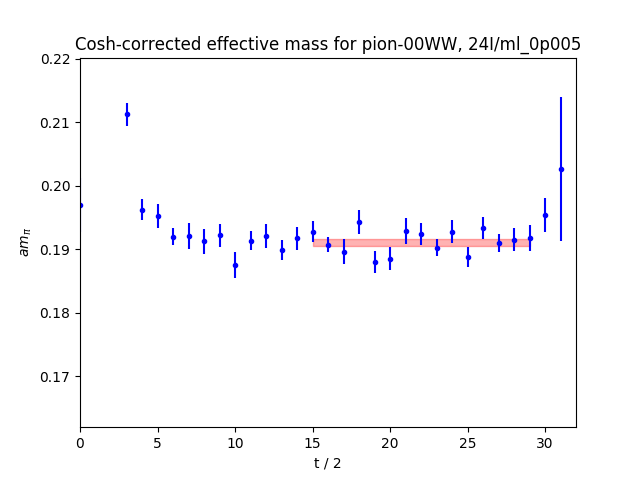

In [7]:
plt.figure()
plt.errorbar(range(m_eff_00WW_mu.shape[0]), m_eff_00WW_mu, yerr = m_eff_00WW_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_00WW, ampi_00WW_mu - ampi_00WW_sigma, ampi_00WW_mu + ampi_00WW_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.22, 0.28))
# plt.title('Cosh-corrected effective mass, pion-00WW, ' + config)
plt.ylim((ampi_00WW_mu - 50 * ampi_00WW_sigma, ampi_00WW_mu + 50 * ampi_00WW_sigma))
plt.title('Cosh-corrected effective mass for pion-00WW, ' + config)
plt.xlabel('t / 2')
plt.ylabel('$a m_{\\pi}$')
plt.show()

In [8]:
# get effective mass for pion-00WP
m_eff_00WP = get_cosh_effective_mass(C2_pion00WP)
m_eff_00WP_mu = np.mean(m_eff_00WP, axis = 0)
m_eff_00WP_sigma = np.std(m_eff_00WP, axis = 0, ddof = 1)

In [9]:
# save fits to file and use that in chiral extrapolation
fit_range_mpi_00WP = range(15, 30)
ampi_00WP_boot, ampi_00WP_chi2, ampi_00WP_ndof = fit_constant(fit_range_mpi_00WP, m_eff_00WP)
ampi_00WP_chi2_ndof = ampi_00WP_chi2 / ampi_00WP_ndof
ampi_00WP_mu = np.mean(ampi_00WP_boot)
ampi_00WP_sigma = np.std(ampi_00WP_boot, ddof = 1)
print('a*m_pi for 00WP = ' + str(ampi_00WP_mu) + ' \pm ' + str(ampi_00WP_sigma))
print('chi^2 / ndof for 00WP = ' + str(ampi_00WP_chi2_ndof))

a*m_pi for 00WP = 0.19104762562425687 \pm 0.0006004648940934525
chi^2 / ndof for 00WP = 0.0720358108324441


<IPython.core.display.Javascript object>


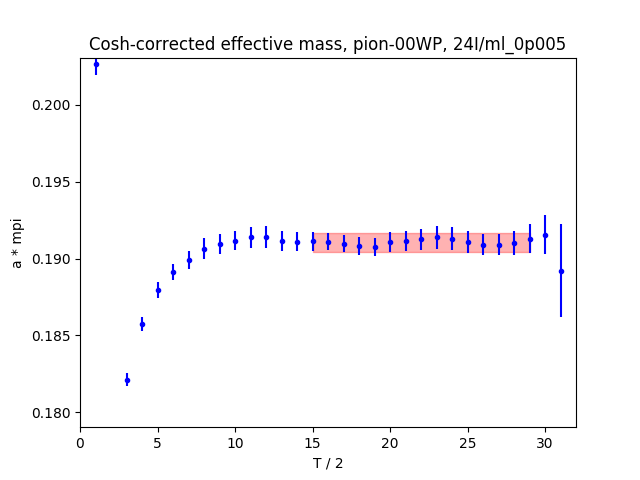

In [10]:
plt.figure()
plt.errorbar(range(m_eff_00WW_mu.shape[0]), m_eff_00WP_mu, yerr = m_eff_00WP_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_mpi_00WP, ampi_00WP_mu - ampi_00WP_sigma, ampi_00WP_mu + ampi_00WP_sigma, color = 'r', alpha = 0.3)
plt.xlim((0, T // 2))
# plt.ylim((0.23, 0.255))
plt.ylim((ampi_00WP_mu - 20 * ampi_00WP_sigma, ampi_00WP_mu + 20 * ampi_00WP_sigma))
plt.title('Cosh-corrected effective mass, pion-00WP, ' + config)
plt.xlabel('T / 2')
plt.ylabel('a * mpi')
plt.show()

#### Try a simultaneous fit on pion masses from each different source

In [11]:
meff_all = [m_eff_00WW, m_eff_00WP]

# Compute ratio of renormalization coefficients

In [12]:
# read in bootstrapped, t-averaged curly A and A data and construct ratio. C2_A[t] is evaluated at t - 1/2
C2_curlyA = np.real(f['za_curlyA'][()])
C2_A = np.real(f['za_A'][()])
# C2_A = np.real(f['za_curlyA'][()])
# C2_curlyA = np.real(f['za_A'][()])
Zratio_boot = (C2_curlyA + np.roll(C2_curlyA, +1, axis = 1))/(4.0*C2_A)+C2_curlyA/(C2_A + np.roll(C2_A, -1, axis = 1))
Zratio_boot_mu = np.mean(Zratio_boot, axis = 0)
Zratio_boot_sigma = np.std(Zratio_boot, axis = 0, ddof = 1)

In [13]:
# fit_range_Zratio = range(15, 50)
fit_range_Zratio = range(15, 40)
Zratio_fits, chi2_Zratio, ndof_Zratio = fit_constant(fit_range_Zratio, Zratio_boot)
chi2_ndof_Zratio = chi2_Zratio / ndof_Zratio
Zratio_mu = np.mean(Zratio_fits, axis = 0)
Zratio_sigma = np.std(Zratio_fits, axis = 0, ddof = 1)
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))
print('chi^2 / ndof for this fit = ' + str(chi2_ndof_Zratio))

ZA / Z_curlyA = 0.7172281936013806 \pm 8.260508135100087e-05
chi^2 / ndof for this fit = 1.2115915616353352


<IPython.core.display.Javascript object>


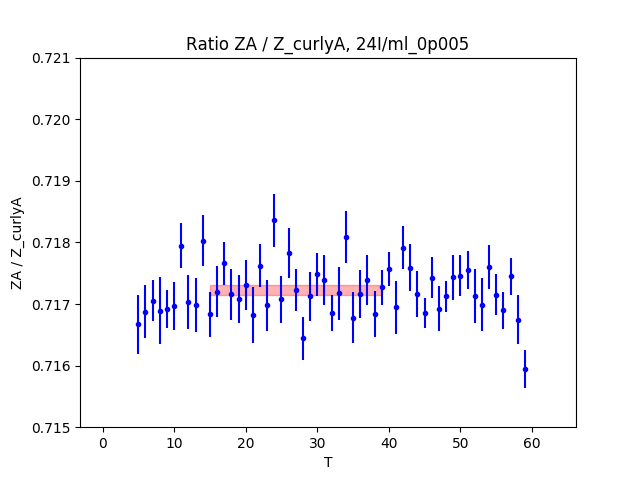

In [14]:
window_size = 0.001
plt.figure()
plt.errorbar(range(Zratio_boot_mu.shape[0]), Zratio_boot_mu, yerr = Zratio_boot_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_Zratio, Zratio_mu - Zratio_sigma, Zratio_mu + Zratio_sigma, color = 'r', alpha = 0.3)
# plt.xlim((0, T // 2))
# plt.ylim((Zratio_mu - window_size, Zratio_mu + window_size))
plt.ylim((0.715, 0.721))
plt.title('Ratio ZA / Z_curlyA, ' + config)
plt.xlabel('T')
plt.ylabel('ZA / Z_curlyA')
plt.show()

# Compute pion decay constant with a few different methods

### (Method 1) Divide out time dependence and fit to a constant

In [15]:
# get overlap factor for the wall source. Divide out by the exponentials
time_dep_plus = np.zeros((n_boot, T), dtype = np.float64)
time_dep_minus = np.zeros((n_boot, T), dtype = np.float64)
for bidx in range(n_boot):
    for t in range(T):
        time_dep_plus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) + np.exp(-ampi_00WW_boot[bidx] * (T - t))
        time_dep_minus[bidx, t] = np.exp(-ampi_00WW_boot[bidx] * t) - np.exp(-ampi_00WW_boot[bidx] * (T - t))
# for the pion-pion correlators, use + and for the axial-pion correlator use -
pion00WW_overlap_sq_boot = np.real(C2_boot / time_dep_plus)
for bidx in range(n_boot):
    pion00WW_overlap_sq_boot[bidx,:] = pion00WW_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)#*ainv_ensemble[bidx])
pion00WW_overlap_boot = np.sqrt(pion00WW_overlap_sq_boot)        # this should be N_pionOOWW
# pion00WW_overlap_boot = pion00WW_overlap_sq_boot        # this should be N_pionOOWW
pion00WW_overlap_mu = np.mean(pion00WW_overlap_boot, axis = 0)
pion00WW_overlap_sigma = np.std(pion00WW_overlap_boot, axis = 0, ddof = 1)

In [16]:
# fit_range_pion00WW = range(15, 45)
fit_range_pion00WW = range(20, 40)
N_pion00WW, chi2_N_pion00WW, ndof_pion00WW = fit_constant(fit_range_pion00WW, pion00WW_overlap_boot)
chi2_ndof_N_pion00WW = chi2_N_pion00WW / ndof_pion00WW
N_pion00WW_mu = np.mean(N_pion00WW)
N_pion00WW_sigma = np.std(N_pion00WW, ddof = 1)
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WW))
# N^2 / 2m = 2.229(19)e
# np.sqrt(N_pion00WW_mu * 2 * 432.2 * 32 / 4)    # this is about what |N| is? I'm just putting random numbers together

Overlap pion-00WW fit: N_P^WW = 1.197427200243191e+06\pm 5.298804149427749e+03
chi^2 / ndof for this fit: 0.05689079353545738


In [17]:
# np.sqrt((L ** 3) * N_pion00WW_mu * 2 * ampi_mu)

<IPython.core.display.Javascript object>


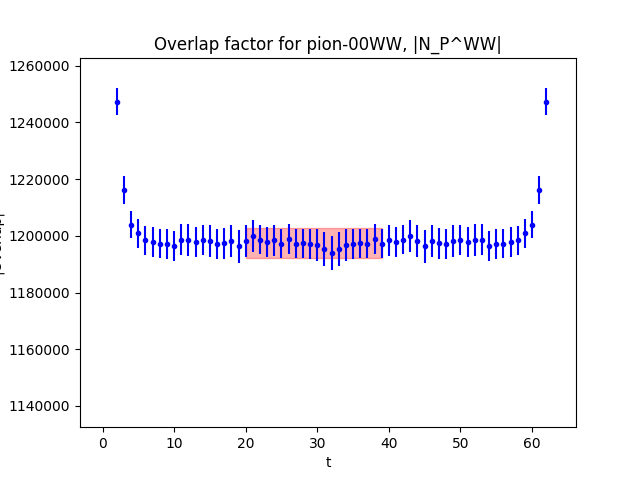

In [18]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WW_overlap_mu, pion00WW_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WW, N_pion00WW_mu - N_pion00WW_sigma, N_pion00WW_mu \
                 + N_pion00WW_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WW, |N_P^WW|')
# plt.title('Overlap factor for pion-00WW, N_P^2 / 2mpi')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WW_mu - N_pion00WW_sigma), 1.05 * (N_pion00WW_mu + N_pion00WW_sigma)))
plt.show()

In [19]:
# 00WP overlap
pion00WP_overlap_sq_boot = np.real(C2_pion00WP / time_dep_plus)
for bidx in range(n_boot):
    pion00WP_overlap_sq_boot[bidx,:] = pion00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
pion00WP_overlap_boot = np.sqrt(pion00WP_overlap_sq_boot)        # this should be N_pionOOWW
pion00WP_overlap_mu = np.mean(pion00WP_overlap_boot, axis = 0)
pion00WP_overlap_sigma = np.std(pion00WP_overlap_boot, axis = 0, ddof = 1)

In [20]:
fit_range_pion00WP = range(15, 45)
# fit_range_pion00WP = range(15, 30)
# fit_range_pion00WP = range(35, 50)
N_pion00WP, chi2_N_pion00WP, ndof_N_pion00WP = fit_constant(fit_range_pion00WP, pion00WP_overlap_boot)
chi2_ndof_N_pion00WP = chi2_N_pion00WP / ndof_N_pion00WP
N_pion00WP_mu = np.mean(N_pion00WP)
N_pion00WP_sigma = np.std(N_pion00WP, ddof = 1)
print('Overlap pion-00WP fit: ' + str(N_pion00WP_mu) + '\pm ' + str(N_pion00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_pion00WP))

Overlap pion-00WP fit: 56255.10226533669\pm 274.1485301858984
chi^2 / ndof for this fit: 0.06734508224057613


<IPython.core.display.Javascript object>


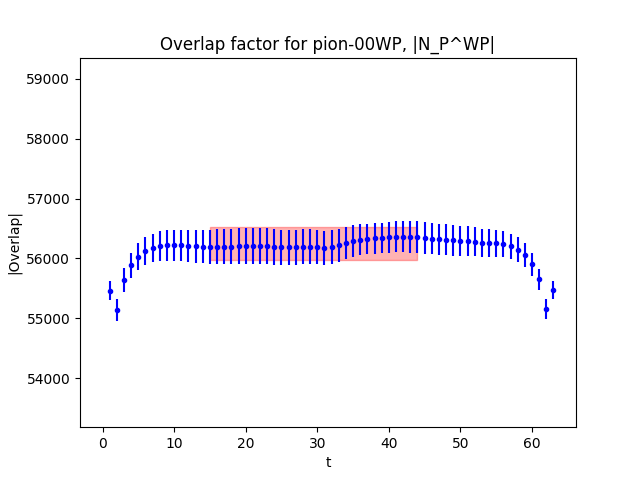

In [21]:
# Extract overlap
plt.figure()
plt.errorbar(range(T), pion00WP_overlap_mu, pion00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_pion00WP, N_pion00WP_mu - N_pion00WP_sigma, N_pion00WP_mu + N_pion00WP_sigma, color = 'r', alpha = 0.3)
plt.title('Overlap factor for pion-00WP, |N_P^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_pion00WP_mu - N_pion00WP_sigma), 1.05 * (N_pion00WP_mu + N_pion00WP_sigma)))
plt.show()

In [22]:
# fpOOWW: antisymmetric and time_dep_minus goes to 0 at T / 2
fp00WP_overlap_sq_boot = np.abs(C2_fpWP / time_dep_minus)
# TODO replace this with something that's actually correct-- FOLD AROUND MIDPOINT INSTEAD
fp00WP_overlap_sq_boot[np.isinf(fp00WP_overlap_sq_boot)] = 0
for bidx in range(n_boot):
    fp00WP_overlap_sq_boot[bidx,:] = fp00WP_overlap_sq_boot[bidx, :] * (2 * ampi_00WW_boot[bidx]) * (L ** 3)
# TODO: write out the equations for what overlap factor this is
# fp00WP_overlap_boot = np.sqrt(fp00WP_overlap_sq_boot)
# Since this is mixed axial-pseudoscalar, divide out by the pseudoscalar one
fp00WP_overlap_boot = np.abs(fp00WP_overlap_sq_boot) / np.abs(pion00WP_overlap_boot)
# fold over since it's antisymmetric
fp00WP_overlap_boot = np.real(fold(fp00WP_overlap_boot, T, folder = np.add))
fp00WP_overlap_mu = np.mean(fp00WP_overlap_boot, axis = 0)
fp00WP_overlap_sigma = np.std(fp00WP_overlap_boot, axis = 0, ddof = 1)

/Users/theoares/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [23]:
# fit_range_fp00WP = range(10, 30)
fit_range_fp00WP = range(15, 30)
N_fp00WP, chi2_N_fp00WP, ndof_N_fp00WP = fit_constant(fit_range_fp00WP, fp00WP_overlap_boot)
chi2_ndof_N_fp00WP = chi2_N_fp00WP / ndof_N_fp00WP
N_fp00WP_mu = np.mean(N_fp00WP)
N_fp00WP_sigma = np.std(N_fp00WP, ddof = 1)
print('Overlap fp00WP fit: ' + str(N_fp00WP_mu) + '\pm ' + str(N_fp00WP_sigma))
print('chi^2 / ndof for this fit: ' + str(chi2_ndof_N_fp00WP))

Overlap fp00WP fit: 6677.088977902033\pm 22.067412078103644
chi^2 / ndof for this fit: 0.03338901024524484


<IPython.core.display.Javascript object>


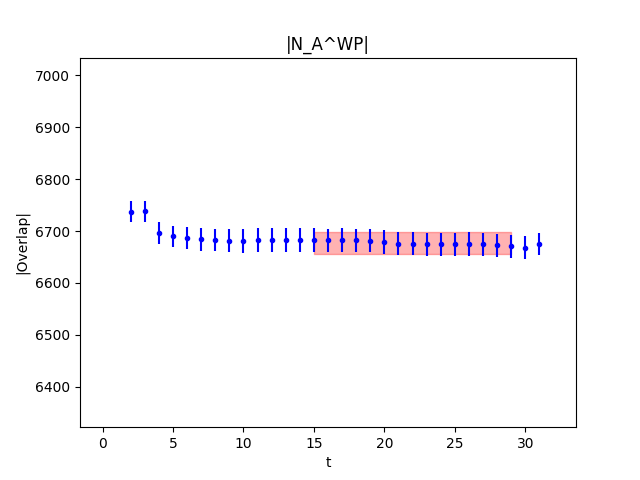

In [24]:
# Extract overlap. Note that we've artifically set the midpoint to 0 as there's a divide by 0 there
plt.figure()
plt.errorbar(range(T // 2 + 1), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
# plt.errorbar(range(T), fp00WP_overlap_mu, fp00WP_overlap_sigma, fmt = '.', c = 'b')
plt.fill_between(fit_range_fp00WP, N_fp00WP_mu - N_fp00WP_sigma, N_fp00WP_mu + N_fp00WP_sigma, color = 'r', alpha = 0.3)
plt.title('|N_A^WP|')
plt.xlabel('t')
plt.ylabel('|Overlap|')
plt.ylim((0.95 * (N_fp00WP_mu - N_fp00WP_sigma), 1.05 * (N_fp00WP_mu + N_fp00WP_sigma)))
plt.show()

In [25]:
# combine and get estimate for fpi
vol = L ** 3
afpi_boot = (1 / (ampi_00WW_boot * vol)) * np.abs(N_pion00WP) * np.abs(N_fp00WP) / np.abs(N_pion00WW)
afpi_mu = np.mean(afpi_boot)
afpi_sigma = np.std(afpi_boot, ddof = 1)
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))

afpi bare = 0.11876952150662179 \pm 0.00037316502376050925


In [26]:
# Renormalize fpi
afpi_renorm_boot = Zratio_fits * afpi_boot
afpi_renorm_mu = np.mean(afpi_renorm_boot, axis = 0)
afpi_renorm_sigma = np.std(afpi_renorm_boot, axis = 0, ddof = 1)
print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

afpi renorm = 0.08518484636488706 \pm 0.00026685473856694026


### (Method 2) VarPro with results from effective mass fit

In [27]:
# fit C2_boot at each bootstrap by plugging in our fit result for mpi. Note that m = vector of length N_params
N_params = 1
f0 = lambda m, t : np.exp(-m[0] * t) + np.exp(-m[0] * (T - t))
f_fit = [f0]        # should be a vector of size N_params
A = lambda m : np.array([[f_fit[i](m, t) / C2_boot_sigma[t] for i in range(N_params)] for t in range(T)])
z = np.array([[C2_boot[bidx, t] / C2_boot_sigma[t] for t in range(T)] for bidx in range(n_boot)])
a_boot = np.zeros((n_boot), dtype = np.float64)
for bidx in range(n_boot):
    m_boot = np.array([ampi_00WW_boot[bidx]])    # guess for b
    Ab = A(m_boot)
    #a_boot[bidx] = np.sum(Ab * z[bidx]) / np.sum(Ab * Ab)
    a_boot[bidx] = ahat(Ab, z[bidx])
a_boot_mu = np.mean(a_boot)        # Should expect that a_boot = |N|^2 / 2m
a_boot_sigma = np.std(a_boot, ddof = 1)
print('Method 2, Overlap |N_W|^2 / 2m = ' + np.format_float_scientific(a_boot_mu) + ' \pm ' \
      + np.format_float_scientific(a_boot_sigma))
# 2.318(14) e8

Method 2, Overlap |N_W|^2 / 2m = 2.790271178510196e+08 \pm 1.7841555851201913e+06


In [28]:
# 2.3189662580853543e+08 \pm 1.4320112779951137e+06

### (Method 3) VarPro

In [29]:
# Minimize chi^2 for a(b) and get results for b parameter (which is mpi)
m_varpro = np.zeros((n_boot), dtype = np.float64)
m0 = np.array([ampi_00WW_mu], dtype = np.float64)
for bidx in range(n_boot):
    out = optimize.minimize(chi2_varpro, m0, args = (A, z[bidx]), method = 'Powell')
    m_varpro[bidx] = out['x']

In [30]:
m_varpro_mu = np.mean(m_varpro)
m_varpro_sigma = np.std(m_varpro, ddof = 1)
print('mpi from varpro = ' + str(m_varpro_mu) + ' \pm ' + str(m_varpro_sigma))

mpi from varpro = 0.19586797828197763 \pm 0.0006401783992278012


In [31]:
# get back overlap factor
varpro_overlap = np.array([ahat(A([m_varpro[bidx]]), z[bidx]) for bidx in range(n_boot)])
varpro_overlap_mu = np.mean(varpro_overlap)
varpro_overlap_sigma = np.std(varpro_overlap, ddof = 1)
print('Varpro overlap factor: |N|^2 / 2m = ' + np.format_float_scientific(varpro_overlap_mu) + ' \pm ' \
      + np.format_float_scientific(varpro_overlap_sigma))

Varpro overlap factor: |N|^2 / 2m = 2.9390313369043475e+08 \pm 1.882762022490884e+06


# Save data for mpi, fpi, ZA

In [32]:
print('a*m_pi for pion-00WW = ' + str(ampi_00WW_mu) + ' \pm ' + str(ampi_00WW_sigma))
print('ZA / Z_curlyA = ' + str(Zratio_mu) + ' \pm ' + str(Zratio_sigma))
print('Overlap pion-00WW fit: N_P^WW = ' + np.format_float_scientific(N_pion00WW_mu) + '\pm ' \
      + np.format_float_scientific(N_pion00WW_sigma))
print('afpi bare = ' + str(afpi_mu) + ' \pm ' + str(afpi_sigma))
print('afpi renorm = ' + str(afpi_renorm_mu) + ' \pm ' + str(afpi_renorm_sigma))

a*m_pi for pion-00WW = 0.19105662407022286 \pm 0.0005824461899500304
ZA / Z_curlyA = 0.7172281936013806 \pm 8.260508135100087e-05
Overlap pion-00WW fit: N_P^WW = 1.197427200243191e+06\pm 5.298804149427749e+03
afpi bare = 0.11876952150662179 \pm 0.00037316502376050925
afpi renorm = 0.08518484636488706 \pm 0.00026685473856694026


In [33]:
# fout_path = '/Users/theoares/Dropbox (MIT)/research/0nubb/short_distance/analysis_output/'+config+'/twopt_out.h5'
# fout = h5py.File(fout_path, 'w')
# fout['ampi'] = ampi_00WW_boot
# fout['afpi'] = afpi_renorm_boot
# fout['ZA_ratio'] = Zratio_boot
# fout.close()